<h2>Examen Parcial 2da parte</h2>
<h3>Generación de números pseudoaleatorios <br>
Método congruencial mixto</h3>

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Generador congruencial mixto
def gcm(x): # x es la semilla
    a = 16807  # Multiplicador
    c = 18446744073709551603  # Incremento
    m = 2**31-1  # Modulo
    while True:
        x = (a * x + c) % m
        yield x

def media(data):
    sum = 0
    for i in range(len(data)):
        sum += data[i]
    return sum / len(data)

def varianza(data):
    sum = 0
    for i in range(len(data)):
        sum += (data[i]) ** 2
    return (sum / len(data)-1) - (len(data)*media(data)**2/(len(data)-1))


def lanzarDados(n):
    resultados = []  # Lista vacia
    resultadosDado1 = []  # Lista vacia para guardar los resultados del dado 1
    resultadosDado2 = []  # Lista vacia para guardar los resultados del dado 2
    random = gcm(120871089547)  # Generador de numeros aleatorios 

    # Genera n resultados aleatorios
    for i in range(n):
        dado1 = next(random)%6+1
        dado2 = next(random)%6+1
        resultadosDado1.append(dado1)  # Guarda los resultados del dado 1
        resultadosDado2.append(dado2)  # Guarda los resultados del dado 2
        # Guarda la suma de los resultados de los dados
        resultados.append(dado1+dado2)

    # Retorna la lista de resultados
    data = pd.DataFrame(resultados).rename(columns={0: 'Suma'}).join(pd.DataFrame(resultadosDado1).rename(
        columns={0: 'Dado 1'})).join(pd.DataFrame(resultadosDado2).rename(columns={0: 'Dado 2'}))
    data.index += 1
    data.to_csv('resultados.csv')

    # Genera una lista del conteo de cada resultado
    dataResultados = pd.DataFrame(resultados).value_counts(
    ).rename_axis('Resultados').reset_index(name='counts')
    display(dataResultados)
    dataResultados.sort_values(by=['Resultados'], inplace=True)

    print("Media: ", media(dataResultados['counts']))
    print("Varianza: ", varianza(dataResultados['counts']))
    
    # Grafica los resultados en un grafico de barras
    dataResultados.plot(kind='bar', x='Resultados', y='counts',
                        title='Resultados de ' + str(n) + ' lanzamientos de dos dados')
    plt.show()

    # Grafica los resultados en un grafico de pastel\
    resultados = pd.Series(resultados).value_counts()
    resultados.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['red', 'blue', 'green', 'yellow', 'orange',
                'purple', 'pink', 'brown', 'gray', 'black', 'white', 'cyan'],
        title='Resultados de ' + str(n) + ' lanzamientos de dos dados'),
    plt.show()



,Resultados,counts
0,7,1057
1,6,882
2,8,784
3,9,667
4,5,638
5,10,509
6,4,477
7,11,337
8,3,320
9,12,169


Media:  545.4545454545455
Varianza:  47135.545454545354


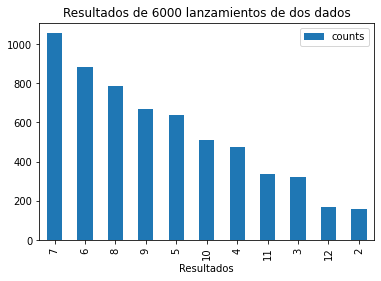

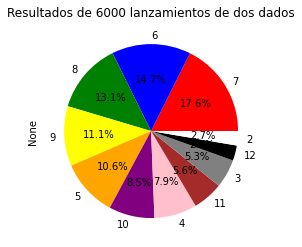

In [178]:
lanzarDados(6000)